## Discrete Fourier Transform

Simple implementation of [DFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#:~:text=External%20links-,Definition,-%5Bedit%5D)
with [autoregressive data](http://nipy.org/nitime/api/generated/nitime.utils.html#:~:text=nitime.utils.-,ar_generator,-\(N%3D512%2C%20sigma) .

In [19]:
%load_ext autoreload
%autoreload 2
%reset -f
import numpy as np
from numpy.fft import fft, fftfreq

import matplotlib.pyplot as plt
import seaborn as sns

import nitime.utils as utils
import nitime.timeseries as ts
import nitime.viz as viz

import msc.data_utils
from msc.data_utils.load import EEGdata, raw_to_array, load_raw_seizure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


file exists locally at C:\raw_data/epilepsiae/surf30/pat_92102/adm_921102/rec_92101102/92101102_0020.data


C:\Users\noam\AppData\Local\Temp/ipykernel_26740/3768905268.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


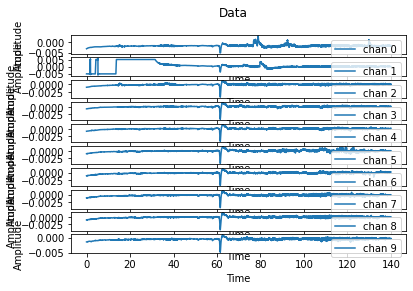

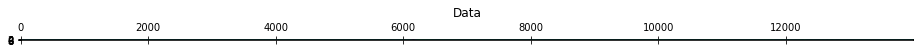

In [20]:
def get_eeg_data(T, fs, d):
    """
    generate synthetic data
    Args:
        N: number of samples
        d: number of channels

    Returns: ndarray (N, d)

    """
    data, times = raw_to_array(load_raw_seizure(package="surf30", patient="pat_92102", seizure_num=3), T, fs, d, return_times=True)

    fig, axes = plt.subplots(d, figsize=(4, 2*d))
    fig.suptitle('Data')
    for chan_idx in range(d):
        axes[chan_idx].plot(times, data[chan_idx], label=f'chan {chan_idx}')
        axes[chan_idx].set_xlabel('Time')
        axes[chan_idx].set_ylabel('Amplitude')
        axes[chan_idx].legend(loc='upper right')
    fig.tight_layout()
    return np.array(data)


# Time (s)
T = 140
# Sample freq (Hz)
fs = 100
# timestep (s)
dt = 1/fs
# Number of channels
d = 10
# Number of samples
N = T * fs

# get data and visualize channels
data = get_eeg_data(T, fs, d)

plt.matshow(data)
plt.title('Data')
plt.show()

In [21]:
def DFT(x):
    """
    Return the Discrete Fourier Transform of a multivariate times series x.
    Args:
        x: (d, N) ndarray
    Returns: X: (N, 2) DFT(x)

    """
    N = x.shape[-1]
    x = x.T
    X = np.array([sum([x[n] * np.exp((-1j * 2 * np.pi / N) * k * n) for n in range(N)]) for k in range(N)])
    return X

dft_euclidean = DFT(data)

C:\Users\noam\.virtualenvs\msc-WSmVxSSb\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


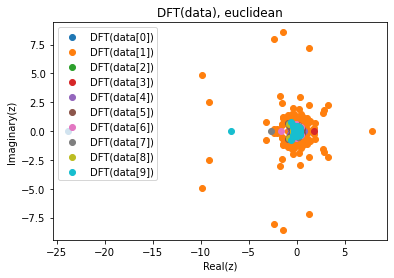

In [22]:
plt.title('DFT(data), euclidean')
for i in range(d):
    plt.scatter(dft_euclidean.real[:,i], dft_euclidean.imag[:,i], label=f'DFT(data[{i}])')
plt.ylabel('Imaginary(z)')
plt.xlabel('Real(z)')
plt.legend()
plt.show()

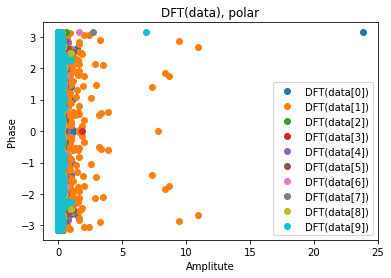

In [23]:
polar2z = lambda r,θ: r * np.exp( 1j * θ )
z2polar = lambda z: ( np.abs(z), np.angle(z) )

dft_polar_r, dft_polar_θ = z2polar(dft_euclidean)

plt.title('DFT(data), polar')
for i in range(d):
    plt.scatter(dft_polar_r[:, i], dft_polar_θ[:, i], label=f'DFT(data[{i}])')
plt.xlabel('Amplitute')
plt.ylabel('Phase')
plt.legend()
plt.show()

## 1-d discrete FFT

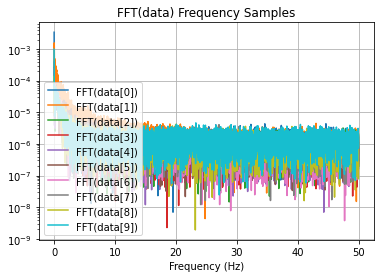

In [24]:
plt.title('FFT(data) Frequency Samples')
xf = np.tile(fftfreq(N, dt), (d,1))[:, :N//2]
yf = fft(data)[:, :N//2]
for i in range(d):
    plt.semilogy(xf[i], 2.0/N*np.abs(yf[i]), label=f'FFT(data[{i}])')
plt.xlabel('Frequency (Hz)')
plt.grid()
plt.legend()
plt.show()

C:\Users\noam\AppData\Local\Temp/ipykernel_26740/3884142505.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


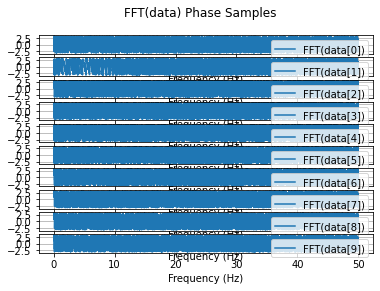

In [25]:
xf = np.tile(fftfreq(N, dt), (d,1))[:, :N//2]
yf = fft(data)[:, :N//2]
yf_r, yf_θ = z2polar(yf)

fig, axes = plt.subplots(d)
fig.suptitle('FFT(data) Phase Samples')
for chan_idx in np.arange(d):
    axes[chan_idx].plot(xf[chan_idx], yf_θ[chan_idx], label=f'FFT(data[{chan_idx}])')
    axes[chan_idx].set_xlabel('Frequency (Hz)')
    axes[chan_idx].grid()
    axes[chan_idx].legend(loc='upper right')
    # axes[chan_idx].set_ylabel('')
fig.tight_layout()
plt.legend(loc='upper right')
plt.show()